In [1]:
#pip install folium

In [2]:
import folium
import pandas as pd
import numpy

In [3]:
중구_위치=pd.read_csv("./중구 위치.csv",encoding='cp949')
중구_위치=중구_위치.drop(['Unnamed: 4'],1)
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [4]:
ID=중구_위치['대여소번호']
중구_위도=중구_위치['위도']
중구_경도=중구_위치['경도']
위도=중구_위도.mean()
경도=중구_경도.mean()

In [5]:
m = folium.Map([위도, 경도], zoom_start = 13)

In [6]:
coords = []
for i in range(len(중구_위치)-1):
    x = 중구_위도[i]
    y = 중구_경도[i]
    coords.append([x, y])
    for i in range(len(coords)):
        folium.Circle(
        location = coords[i],
        radius = 13,
        color = 'red').add_to(m)

In [7]:
m

In [8]:
대여반납이력=pd.read_csv("./대여이력 데이터/공공자전거 대여이력 정보_2021.04.csv", encoding='cp949')

C:\Users\pione\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
대여반납이력=대여반납이력.drop(['자전거번호','대여 대여소명','대여거치대','반납대여소명','이용시간','이용거리','반납거치대'],1)

In [10]:
대여반납이력

,대여일시,대여 대여소번호,반납일시,반납대여소번호
0,2021-03-31 22:04:39,585,2021-04-01 00:00:01,03571
1,2021-03-31 23:47:26,2408,2021-04-01 00:00:03,02615
2,2021-03-31 23:38:54,1222,2021-04-01 00:00:04,02631
3,2021-03-31 23:58:28,1709,2021-04-01 00:00:06,01774
4,2021-03-31 23:47:27,2745,2021-04-01 00:00:06,02746
...,...,...,...,...
3027526,2021-04-30 23:57:21,1013,2021-04-30 23:59:56,01020
3027527,2021-04-30 22:41:41,2301,2021-04-30 23:59:56,02429
3027528,2021-04-30 23:33:45,3803,2021-04-30 23:59:57,03803
3027529,2021-04-30 23:23:18,2173,2021-04-30 23:59:58,02179


In [11]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype(str)
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype(str)

In [12]:
대여반납이력 = 대여반납이력[대여반납이력['반납대여소번호'].apply(lambda x: x.isnumeric())]
대여반납이력 = 대여반납이력[대여반납이력['대여 대여소번호'].apply(lambda x: x.isnumeric())]

In [13]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype('int')
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype('int')

# 구별대여소번호

In [14]:
구별대여소번호=pd.read_csv("./station_구별.csv", encoding='cp949')

In [15]:
구별대여소번호

,Unnamed: 0,대여소번호,소재지.위치.
0,5,102,마포구
1,6,103,마포구
2,7,104,마포구
3,8,105,마포구
4,9,106,마포구
...,...,...,...
2462,2467,4864,송파구
2463,2468,4865,송파구
2464,2469,4867,송파구
2465,2470,4868,송파구


In [16]:
구별대여소번호_중구=구별대여소번호[구별대여소번호['소재지.위치.']=='중구'];구별대여소번호_중구

,Unnamed: 0,대여소번호,소재지.위치.
178,183,300,중구
188,193,310,중구
189,194,312,중구
192,197,318,중구
193,198,320,중구
...,...,...,...
2435,2440,4792,중구
2436,2441,4793,중구
2437,2442,4794,중구
2438,2443,4796,중구


# 대여이력

In [17]:
대여이력=대여반납이력.drop(['반납대여소번호','반납일시'],1)

In [18]:
대여이력

,대여일시,대여 대여소번호
0,2021-03-31 22:04:39,585
1,2021-03-31 23:47:26,2408
2,2021-03-31 23:38:54,1222
3,2021-03-31 23:58:28,1709
4,2021-03-31 23:47:27,2745
...,...,...
3027526,2021-04-30 23:57:21,1013
3027527,2021-04-30 22:41:41,2301
3027528,2021-04-30 23:33:45,3803
3027529,2021-04-30 23:23:18,2173


In [19]:
대여이력=대여이력.rename(columns={'대여 대여소번호':'대여소번호'})
대여이력_자치구=대여이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
대여이력_자치구=대여이력_자치구.rename(columns={'소재지.위치.':'자치구'})

# 대여이력_중구

In [20]:
대여이력_중구=대여이력_자치구[대여이력_자치구['자치구']=='중구']

In [21]:
대여이력_중구=대여이력_중구.drop(['Unnamed: 0'],1)

In [22]:
len(대여이력_중구['대여소번호'].unique())

83

In [23]:
대여이력_중구['대여일시']= pd.to_datetime(대여이력_중구['대여일시'])

In [24]:
대여이력_중구['대여일시_hour']=대여이력_중구['대여일시'].dt.hour
대여이력_중구['대여일시_date']=대여이력_중구['대여일시'].dt.date

In [25]:
대여이력_중구['대여일시_date']

101157     2021-03-31
101158     2021-04-01
101159     2021-04-01
101160     2021-04-01
101161     2021-04-01
              ...    
2989720    2021-04-30
2989721    2021-04-30
2989722    2021-04-30
2989723    2021-04-30
2989724    2021-04-30
Name: 대여일시_date, Length: 66705, dtype: object

In [26]:
대여이력_중구['대여일시_date']=대여이력_중구['대여일시_date'].astype(str)

In [27]:
대여이력_중구=대여이력_중구[대여이력_중구['대여일시_date']=='2021-04-24']

In [28]:
대여이력_중구

,대여일시,대여소번호,자치구,대여일시_hour,대여일시_date
101438,2021-04-24 09:15:48,4766,중구,9,2021-04-24
101439,2021-04-24 12:06:17,4766,중구,12,2021-04-24
101440,2021-04-24 14:36:59,4766,중구,14,2021-04-24
101441,2021-04-24 17:12:51,4766,중구,17,2021-04-24
101442,2021-04-24 17:10:45,4766,중구,17,2021-04-24
...,...,...,...,...,...
2989386,2021-04-24 20:30:25,381,중구,20,2021-04-24
2989662,2021-04-24 10:44:07,384,중구,10,2021-04-24
2989663,2021-04-24 12:37:47,384,중구,12,2021-04-24
2989664,2021-04-24 19:59:16,384,중구,19,2021-04-24


In [29]:
대여이력_중구=대여이력_중구[(대여이력_중구['대여일시_hour']>= 6) & (대여이력_중구['대여일시_hour'] < 11)]

In [30]:
len(대여이력_중구['대여소번호'].unique())

53

In [31]:
grouped = 대여이력_중구.groupby(['대여소번호','대여일시_date'])
grouped_대여=pd.DataFrame(grouped.count())
grouped_대여

,,대여일시,자치구,대여일시_hour
대여소번호,대여일시_date,,,
300,2021-04-24,8,8,8
310,2021-04-24,2,2,2
318,2021-04-24,1,1,1
321,2021-04-24,1,1,1
322,2021-04-24,1,1,1
324,2021-04-24,1,1,1
332,2021-04-24,1,1,1
336,2021-04-24,3,3,3
346,2021-04-24,4,4,4


In [32]:
grouped_대여=grouped_대여.drop(['자치구','대여일시_hour'],1)
grouped_대여=grouped_대여.rename(columns={'대여일시':'대여수'})

# 반납이력

In [33]:
반납이력=대여반납이력.drop(['대여 대여소번호','대여일시'],1)
반납이력

,반납일시,반납대여소번호
0,2021-04-01 00:00:01,3571
1,2021-04-01 00:00:03,2615
2,2021-04-01 00:00:04,2631
3,2021-04-01 00:00:06,1774
4,2021-04-01 00:00:06,2746
...,...,...
3027526,2021-04-30 23:59:56,1020
3027527,2021-04-30 23:59:56,2429
3027528,2021-04-30 23:59:57,3803
3027529,2021-04-30 23:59:58,2179


In [34]:
반납이력=반납이력.rename(columns={'반납대여소번호':'대여소번호'})
반납이력_자치구=반납이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
반납이력_자치구=반납이력_자치구.rename(columns={'소재지.위치.':'자치구'})

In [35]:
반납이력_중구=반납이력_자치구[반납이력_자치구['자치구']=='중구']

In [36]:
반납이력_중구=반납이력_중구.drop(['Unnamed: 0'],1)

In [37]:
len(반납이력_중구['대여소번호'].unique())

83

In [38]:
반납이력_중구['반납일시']= pd.to_datetime(반납이력_중구['반납일시'])

In [39]:
반납이력_중구['반납일시_hour']=반납이력_중구['반납일시'].dt.hour
반납이력_중구['반납일시_date']=반납이력_중구['반납일시'].dt.date

In [40]:
반납이력_중구['반납일시_date']=반납이력_중구['반납일시_date'].astype(str)

In [41]:
반납이력_중구=반납이력_중구[반납이력_중구['반납일시_date']=='2021-04-23']

In [42]:
반납이력_중구=반납이력_중구[(반납이력_중구['반납일시_hour']>= 6) & (반납이력_중구['반납일시_hour'] < 11)]

In [43]:
반납이력_중구['반납일시_hour'].unique()

array([ 8,  9,  6,  7, 10], dtype=int64)

In [44]:
len(반납이력_중구['대여소번호'].unique())

74

In [45]:
반납이력_중구

,반납일시,대여소번호,자치구,반납일시_hour,반납일시_date
659892,2021-04-23 08:16:21,475,중구,8,2021-04-23
659893,2021-04-23 08:43:07,475,중구,8,2021-04-23
659894,2021-04-23 08:46:06,475,중구,8,2021-04-23
659895,2021-04-23 08:51:53,475,중구,8,2021-04-23
659896,2021-04-23 08:56:32,475,중구,8,2021-04-23
...,...,...,...,...,...
2974337,2021-04-23 07:54:27,4760,중구,7,2021-04-23
2974338,2021-04-23 08:49:51,4760,중구,8,2021-04-23
2981851,2021-04-23 09:22:07,4766,중구,9,2021-04-23
2981852,2021-04-23 10:47:43,4766,중구,10,2021-04-23


In [46]:
grouped1 = 반납이력_중구.groupby(['대여소번호','반납일시_date'])
grouped_반납=pd.DataFrame(grouped1.count())

In [47]:
grouped_반납

,,반납일시,자치구,반납일시_hour
대여소번호,반납일시_date,,,
300,2021-04-23,19,19,19
310,2021-04-23,13,13,13
318,2021-04-23,10,10,10
320,2021-04-23,16,16,16
321,2021-04-23,12,12,12
...,...,...,...,...
4785,2021-04-23,13,13,13
4791,2021-04-23,10,10,10
4792,2021-04-23,6,6,6


In [48]:
grouped_반납=grouped_반납.drop(['자치구','반납일시_hour'],1)
grouped_반납=grouped_반납.rename(columns={'반납일시':'반납수'})

In [49]:
grouped_반납

,,반납수
대여소번호,반납일시_date,
300,2021-04-23,19
310,2021-04-23,13
318,2021-04-23,10
320,2021-04-23,16
321,2021-04-23,12
...,...,...
4785,2021-04-23,13
4791,2021-04-23,10
4792,2021-04-23,6


grouped_대여반납_출근 (중구/2021-06-30/시간대(6~10)/대여반납수)

In [50]:
grouped_대여반납_출근=grouped_대여.merge(grouped_반납,on=['대여소번호'],how='inner');grouped_대여반납_출근

,대여수,반납수
대여소번호,,
300,8,19
310,2,13
318,1,10
321,1,12
322,1,8
324,1,9
332,1,12
336,3,11
346,4,20


In [51]:
len(grouped_대여반납_출근)

49

## grouped_대여반납 (중구/2021-06-30/시간대(4~10)/대여반납수)

In [52]:
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [53]:
중구대여반납=grouped_대여반납_출근.merge(중구_위치,on=['대여소번호'],how='inner')

# 중구대여반납

In [54]:
중구대여반납

,대여소번호,대여수,반납수,대여소명,위도,경도
0,300,8,19,정동사거리,37.568050,126.969231
1,310,2,13,청계광장 옆,37.568878,126.977470
2,318,1,10,광교사거리 남측,37.568527,126.982552
3,321,1,12,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
4,322,1,8,명동성당 앞,37.564476,126.986969
5,324,1,9,신세계백화점 본점 앞,37.561340,126.980400
6,332,1,12,을지로2가 사거리 남측,37.565990,126.987793
7,336,3,11,티마크 호텔 앞,37.562618,126.992836
8,346,4,20,맥스타일 앞,37.569183,127.009880
9,347,1,6,동대문역사문화공원역 9번출구 앞,37.565331,127.007843


In [55]:
거치대데이터=pd.read_csv('./API_data_최종.csv')

In [56]:
거치대데이터=거치대데이터[['stationName','stationId','rackTotCnt','stationLatitude','stationLongitude']]

In [57]:
거치대데이터

,stationName,stationId,rackTotCnt,stationLatitude,stationLongitude
0,102. 망원역 1번출구 앞,ST-4,22,37.555649,126.910629
16,3612. 은곡마을,ST-2677,10,37.467262,127.098015
15,3611. 방죽마을 입구,ST-2676,16,37.471233,127.107216
14,3610. 윗반마을 입구,ST-2675,10,37.465347,127.108803
13,3609. 언주초등학교 입구,ST-2674,10,37.485367,127.038498
...,...,...,...,...,...
339,1956. 도야미리숯불갈비 앞,ST-1218,12,37.510010,126.882050
340,1957. 구일고등학교 정문,ST-1219,17,37.493401,126.874329
341,1958. 강서수도사업소민원센터,ST-1220,12,37.495781,126.890121
328,1931. 개봉역(북측광장),ST-920,12,37.494995,126.858253


In [58]:
거치대데이터_중복제거=거치대데이터.drop_duplicates()

In [59]:
거치대데이터_중복제거=거치대데이터_중복제거.rename(columns={'stationLatitude':'위도','stationLongitude':"경도",'rackTotCnt':'거치대수'})

In [60]:
거치대데이터_중복제거['stationName']=거치대데이터_중복제거['stationName'].astype(str)

In [61]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거.stationName.str.split('.').str[0]

In [62]:
거치대데이터_중복제거=거치대데이터_중복제거[['대여소번호','거치대수']]

In [63]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거['대여소번호'].astype(int)

In [64]:
중구대여반납_거치대=중구대여반납.merge(거치대데이터_중복제거,on=['대여소번호'],how='inner')

In [65]:
중구대여반납_거치대

,대여소번호,대여수,반납수,대여소명,위도,경도,거치대수
0,300,8,19,정동사거리,37.568050,126.969231,9
1,310,2,13,청계광장 옆,37.568878,126.977470,8
2,318,1,10,광교사거리 남측,37.568527,126.982552,12
3,321,1,12,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139,17
4,322,1,8,명동성당 앞,37.564476,126.986969,17
5,324,1,9,신세계백화점 본점 앞,37.561340,126.980400,12
6,332,1,12,을지로2가 사거리 남측,37.565990,126.987793,5
7,336,3,11,티마크 호텔 앞,37.562618,126.992836,12
8,346,4,20,맥스타일 앞,37.569183,127.009880,12
9,347,1,6,동대문역사문화공원역 9번출구 앞,37.565331,127.007843,20


In [66]:
중구대여반납_거치대['(반납-대여)/거치대수']=(중구대여반납_거치대['반납수']-중구대여반납_거치대['대여수'])/중구대여반납_거치대['거치대수']

In [67]:
중구대여반납_거치대=중구대여반납_거치대[['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','위도','경도']]

In [68]:
중구대여반납_거치대

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도
0,300,8,19,9,1.222222,37.568050,126.969231
1,310,2,13,8,1.375000,37.568878,126.977470
2,318,1,10,12,0.750000,37.568527,126.982552
3,321,1,12,17,0.647059,37.565464,126.984139
4,322,1,8,17,0.411765,37.564476,126.986969
5,324,1,9,12,0.666667,37.561340,126.980400
6,332,1,12,5,2.200000,37.565990,126.987793
7,336,3,11,12,0.666667,37.562618,126.992836
8,346,4,20,12,1.333333,37.569183,127.009880
9,347,1,6,20,0.250000,37.565331,127.007843


In [69]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "ratio of 'return-rent' histogram")

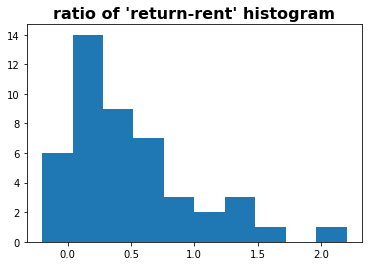

In [70]:
plt.hist(중구대여반납_거치대['(반납-대여)/거치대수'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title("ratio of 'return-rent' histogram", fontdict=title_font)

# 대여소별 자전거수 적정/많음/적음으로 분류
#### (반납-대여)/거치대수가 [-0.03444444, 0.21333333]인 값 : 적정
#### (반납-대여)/거치대수가 [ 0.21333333, ]인 값 : 많음
#### (반납-대여)/거치대수가 [, -0.0.03444444]인 값 : 적음

In [71]:
def get_group(v):
    if v <= 0.28:
        group = '적음'
    elif v >= 0.76:
        group = '많음'
    else:
        group = '적정'
    return group

In [72]:
중구대여반납_거치대['group'] = 중구대여반납_거치대['(반납-대여)/거치대수'].apply(lambda v: get_group(v))
중구대여반납_거치대

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도,group
0,300,8,19,9,1.222222,37.568050,126.969231,많음
1,310,2,13,8,1.375000,37.568878,126.977470,많음
2,318,1,10,12,0.750000,37.568527,126.982552,적정
3,321,1,12,17,0.647059,37.565464,126.984139,적정
4,322,1,8,17,0.411765,37.564476,126.986969,적정
5,324,1,9,12,0.666667,37.561340,126.980400,적정
6,332,1,12,5,2.200000,37.565990,126.987793,많음
7,336,3,11,12,0.666667,37.562618,126.992836,적정
8,346,4,20,12,1.333333,37.569183,127.009880,많음
9,347,1,6,20,0.250000,37.565331,127.007843,적음


In [73]:
중구대여반납_거치대.to_csv("./중구대여반납_거치대24_group_6_10.csv",index_label=False,encoding='utf-8')

In [80]:
df=pd.read_csv("./중구대여반납_거치대24_group_6_10.csv")

In [81]:
len(중구대여반납_거치대[중구대여반납_거치대['group']=='적정'])

16

In [82]:
len(중구대여반납_거치대[중구대여반납_거치대['group'] == '많음'])

10

In [83]:
len(중구대여반납_거치대[중구대여반납_거치대['group'] == '적음'])

20

In [97]:
m = folium.Map([위도, 경도], tiles='cartodbpositron',zoom_start = 14)

In [101]:
coords = []
for i in range(len(df)):
    x = df['위도'][i]
    y = df['경도'][i]
    coords.append([x, y])

for i in range(len(df)):  # len함수로 전체 대여소 갯수 파악, for문을 통해 반복 수행 
    station_id=df['대여소번호'][i]  # 마우스 올렸을 때 id 표시를 위해서 id값 추출 
    max_bc_count=float(abs(df['(반납-대여)/거치대수'][i]))*30  # 거치대 수를 max_bc_count 변수 지정 
    if df['group'][i] == '적음' :  # if문을 활용하여 station type 색 지정,
        station_color='red'
    elif df['group'][i] == '많음' : 
        station_color='blue'
    else :station_color='green'    
    folium.Circle(location=coords[i],radius=max_bc_count,color=station_color,fill=True,fill_opacity=1,tooltip=station_id,popup=max_bc_count).add_to(m)
   
m